In [122]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('NetAtmo_2016.csv', 
                   index_col=1,      # use column 1 as the dates to index the data
                   parse_dates=True) # convert the date string into a date object
data[-5:]

,Timestamp,Temperature,Humidity,CO2,Noise,Pressure
Timezone : America/Los_Angeles,,,,,,
2016-12-31 23:35:00,1483256148,21.7,34,483.0,37.0,1009.3
2016-12-31 23:40:00,1483256449,21.7,34,485.0,38.0,1009.2
2016-12-31 23:45:00,1483256751,21.7,34,489.0,37.0,1009.0
2016-12-31 23:50:00,1483257054,21.8,34,475.0,38.0,1008.9
2016-12-31 23:55:00,1483257356,21.8,34,475.0,37.0,1008.9


In [123]:
inside_concentration = data['CO2']
concentration_slope = data['CO2'].diff()/data['Timestamp'].diff()
concentration_slope.plot()


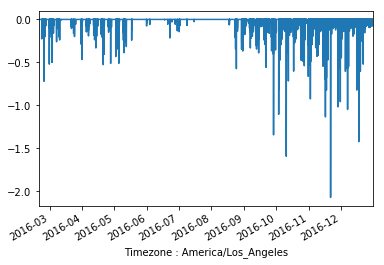

In [124]:
concentration_slope = concentration_slope.where(concentration_slope<0, 0)
concentration_slope = concentration_slope.where(data['CO2']>450, 0)
concentration_slope.plot()

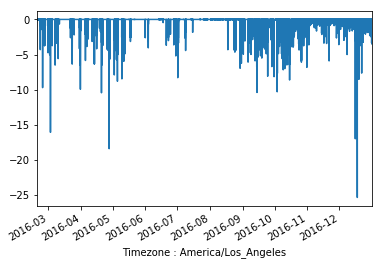

In [125]:
infiltration_rate = concentration_slope/((inside_concentration - 400.).abs())*3600
infiltration_rate.plot()

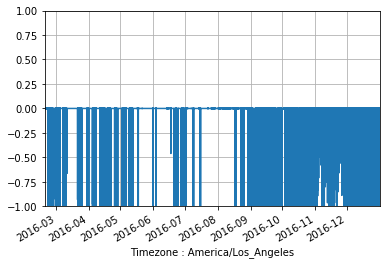

In [126]:
ax = infiltration_rate.plot()
ax.set_ylim((-1,1))
ax.grid()
plt.savefig('test.pdf')

In [127]:
infiltration_rate.describe()

count    89756.000000
mean        -0.116603
std          0.437253
min        -25.341272
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
dtype: float64

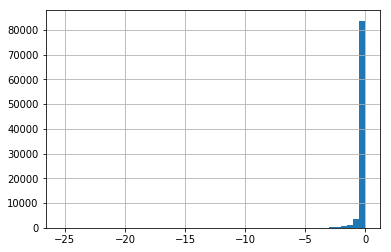

In [128]:
infiltration_rate.hist(bins=50)

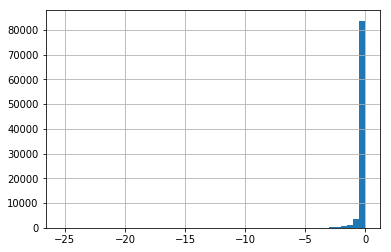

In [129]:
infiltration_rate.hist(bins=50)

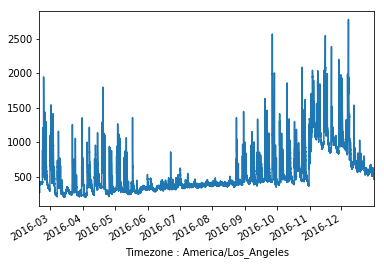

In [130]:
data['CO2'].plot()

In [131]:
time2 = '2016-04-19 12:18:29'
time1 = '2016-04-19 12:43:36'

data[time2:time1]

In [132]:
time2 = '2016-04-19 12:18:29'
time1 = '2016-04-19 12:43:36'
rise = data['CO2'][time2] - data['CO2'][time1]
run = (data['Timestamp'][time2] - data['Timestamp'][time1])


print(data['CO2'][time2])
print(rise)
print('run =',run)
print('slope =', rise/run)
rise / run * 3600 / (data['CO2'][time2]-400)

Series([], Name: CO2, dtype: float64)
Series([], Name: CO2, dtype: float64)
run = Series([], Name: Timestamp, dtype: int64)
slope = Series([], dtype: float64)


Series([], dtype: float64)

# Matty's 2016 trial of our analysis for Infiltration Nation

Starting with the calculations of three samples of CO2 decay after EMD forum to get an average CO2 decay per hour.

In [133]:
time2 = '2016-03-02 18:09:00' #Date for: Peak CO2 reading, first Wed of March at end of EMD forum last spring
time1 = '2016-03-02 19:09:00' #Date for: CO2 reading an hour after conclusion of EMD forum

data[time2:time1]

In [134]:
first_peakCO2_EMDforum = 1072 
first_CO2_hourafterEMDforum = 943
first_CO2decay_per_hour = first_peakCO2_EMDforum - first_CO2_hourafterEMDforum
first_peakCO2_EMDforum - first_CO2_hourafterEMDforum

129

In [135]:
first_CO2decay_per_hour = 129 #doors open or not?

In [136]:
time2 = '2016-03-09 18:18:00' #Date for: Peak CO2 reading, second Wed of March at end of EMD forum last spring
time1 = '2016-03-09 19:18:00' #Date for: CO2 reading an hour after conclusion of EMD forum

data[time2:time1]

In [137]:
secnd_peakCO2_EMDforum = 771
secnd_CO2_hourafterEMDforum = 730
secnd_CO2decay_per_hour = secnd_peakCO2_EMDforum - secnd_CO2_hourafterEMDforum
secnd_peakCO2_EMDforum - secnd_CO2_hourafterEMDforum

41

In [138]:
secnd_CO2decay_per_hour = 41 #doors closed or something?

In [139]:
time2 = '2016-03-23 17:28:00' #Date for: Peak CO2 reading, fourth Wed of March at end of EMD forum last spring; no class third Wed
time1 = '2016-03-23 18:28:00' #Date for: CO2 reading an hour after conclusion of EMD forum

data[time2:time1]

In [140]:
third_peakCO2_EMDforum = 587
third_CO2_hourafterEMDforum = 509
third_CO2decay_per_hour = third_peakCO2_EMDforum - third_CO2_hourafterEMDforum
third_peakCO2_EMDforum - third_CO2_hourafterEMDforum

78

In [141]:
third_CO2decay_per_hour = 78 #door cracked or something?

In [142]:
first_CO2decay_per_hour = 129
secnd_CO2decay_per_hour = 41
third_CO2decay_per_hour = 78
avg_CO2decay_per_hour = (first_CO2decay_per_hour + secnd_CO2decay_per_hour + third_CO2decay_per_hour) / 3
(first_CO2decay_per_hour + secnd_CO2decay_per_hour + third_CO2decay_per_hour) / 3

82.66666666666667

In [143]:
avg_CO2decay_per_hour = 82.7

Because I used the average of three sample CO2 decays, now we need to get the average of the peak CO2 in the ETC at the end of each EMD forum to be a representative peak CO2 that we can ratio with the volume of the ETC.

In [144]:
first_peakCO2_EMDforum = 1072
secnd_peakCO2_EMDforum = 771
third_peakCO2_EMDforum = 587
avg_peakCO2_EMDforum = (first_peakCO2_EMDforum + secnd_peakCO2_EMDforum + third_peakCO2_EMDforum) / 3 
(first_peakCO2_EMDforum + secnd_peakCO2_EMDforum + third_peakCO2_EMDforum) / 3 

810.0

In [145]:
avg_peakCO2_EMDforum = 810

In [146]:
avg_peakCO2_EMDforum = 810
ETC_vlme_cubicft = ? #need to calculate ETC volume in cubic feet using blueprints before running calculation
CO2_per_cubicft = avg_peakCO2_EMDforum / ETC_vlme_cubicft
avg_peakCO2_EMDforum / ETC_vlme_cubicft

SyntaxError: invalid syntax (<ipython-input-146-ed1825691262>, line 2)

With the CO2 decay per hour and CO2 per cubic feet, we can then divide the two figures and get to an infiltration rate of cubic feet per hour!
- We can take the calculation further to get a CFM if we want by further dividing by 60 minutes